# Data Engineering

Data Engineering, the process of gathering and preparing data for analysis, is a very big part of Data Science.

Datasets might not be formatted in the way you need (e.g. you have categorical features but your algorithm requires numerical features); or you might need to cross-reference some dataset to another that has a different format; or you might be dealing with a dataset that contains missing or invalid data.

These are just a few examples of why data retrieval and cleaning are so important.

## Retrieving data from the web

### requests

The first task you'll have on HW1 will be to retrieve some data from the Internet. Python has many built-in libraries that were developed over the years to do exactly that (e.g. urllib, urllib2, urllib3).

However, these libraries are very low-level and somewhat hard to use. They become especially cumbersome when you need to issue POST requests or authenticate against a web service.

Luckly, as with most tasks in Python, someone has developed a library that simplifies these tasks. In reality, the requests made both on this lab and on HW1 are fairly simple, and could easily be done using one of the built-in libraries. However, it is better to get acquainted to `requests` as soon as possible, since you will probably need it in the future.

In [48]:
# You tell Python that you want to use a library with the import statement.
import requests

Now that the requests library was imported into our namespace, we can use the functions offered by it.

In this case we'll use the appropriately named `get` function to issue a *GET* request. This is equivalent to typing a URL into your browser and hitting enter.

In [49]:
# Get the HU Wikipedia page
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")
req_2 = requests.get('https://www.fcbarcelona.com/en/')

Python is an Object Oriented language, and everything on it is an object. Even built-in functions such as `len` are just syntactic sugar for acting on object properties.

We will not dwell too long on OO concepts, but some of Python's idiosyncrasies will be easier to understand if we spend a few minutes on this subject.

When you evaluate an object itself, such as the `req` object we created above, Python will automatially call the `__str__()` or `__repr__()` method of that object. The default values for these methods are usually very simple and boring. The `req` object however has a custom implementation that shows the object type (i.e. `Response`) and the HTTP status number (200 means the request was successful).

In [50]:
req
req_2

<Response [200]>

Just to confirm, we will call the `type` function on the object to make sure it agrees with the value above.

In [51]:
type(req)
type(req_2)

requests.models.Response

Another very nifty Python function is `dir`. You can use it to list all the properties of an object.

By the way, properties starting with a single and double underscores are usually not meant to be called directly.

In [52]:
# dir(obj) => list all the properties.
dir(req)
dir(req_2)

#
a = "hi"
dir(a)
# req object . (encoding, text)
print(req_2.encoding)
req_2.text.encode('utf-8')

utf-8


'<!DOCTYPE html>\n\n<html lang="en">\n<head>\n    <meta name="twitter:title" content="FC Barcelona  |  Official website "/>\n<meta property="og:type" content="website"/>\n<meta name="description" content="Official FC Barcelona website. All news about the team, ticket sales, member services, supporters club services and information about Bar\xc3\xa7a and the Club"/>\n<meta name="twitter:site" content="@FCB"/>\n<meta name="twitter:description" content="Official FC Barcelona website. All news about the team, ticket sales, member services, supporters club services and information about Bar\xc3\xa7a and the Club"/>\n<meta name="twitter:card" content="summary_large_image"/>\n<meta name="twitter:image" content="https://www.fcbarcelona.com/resources/ver/i/elements/fcb-share.png"/>\n<meta property="og:title" content="FC Barcelona  |  Official website "/>\n<meta property="og:image" content="https://www.fcbarcelona.com/resources/ver/i/elements/fcb-share.png"/>\n<title>FC Barcelona  |  Official we

Right now `req` holds a reference to a *Request* object; but we are interested in the text associated with the web page, not the object itself.

So the next step is to assign the value of the `text` property of this `Request` object to a variable.

In [53]:
codec = req.encoding
page = req.text
page # request에서 유니코드로 받아온 html

u'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Harvard University - Wikipedia</title>\n<script>document.documentElement.className=document.documentElement.className.replace(/(^|\\s)client-nojs(\\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":899959305,"wgRevisionId":899959305,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","CS1: Julian\u2013Gregorian uncertainty","Webarchive template wayback links","Articles with short description","Wikipedia indefinitely move-protected pages","Use American English from February 2019","All Wikipedia articles written in American English","Use mdy da

Great! Now we have the text of the HU Wikipedia page. But this mess of HTML tags would be a pain to parse manually. Which is why we will use another very cool Python library called BeautifulSoup.

### BeautifulSoup

Parsing data would be a breeze if we could always use well formatted data sources, such as CSV, JSON, or XML; but some formats such as HTML are at the same time a very popular and a pain to parse.

One of the problems with HTML is that over the years browsers have evolved to be very forgiving of "malformed" syntax. Your browser is smart enough to detect some common problems, such as open tags, and correct them on the fly.

Unfortunately, we do not have the time or patience to implement all the different corner cases, so we'll let BeautifulSoup do that for us.

You'll notice that the `import` statement bellow is different from what we used for `requests`. The _from library import thing_ pattern is useful when you don't want to reference a function by its full name (like we did with `requests.get`), but you also don't want to import every single thing on that library into your namespace.

In [54]:
from bs4 import BeautifulSoup

BeautifulSoup can deal with HTML or XML data, so the next line parser the contents of the `page` variable using its HTML parser, and assigns the result of that to the `soup` variable.

In [55]:
soup = BeautifulSoup(page, 'html.parser')

Let's check the string representation of the `soup` object.

In [9]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Harvard University - Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>window.RLQ = window.RLQ || []; window.RLQ.push( function () {
mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":680250093,"wgRevisionId":680250093,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from June 2014","All articles containing potentially dated statements","Articles containing potentially dated statements from September 2014","Articles containing potentially dated statements from February 2014","All articles wi

Doesn't look much different from the `page` object representation. Let's make sure the two are different types.

In [56]:
type(page)

unicode

In [57]:
type(soup)

bs4.BeautifulSoup

Looks like they are indeed different.

`BeautifulSoup` objects have a cool little method that allows you to see the HTML content in a nice, indented way.

In [58]:
print soup.prettify()

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Harvard University - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Harvard_University","wgTitle":"Harvard University","wgCurRevisionId":899959305,"wgRevisionId":899959305,"wgArticleId":18426501,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from March 2018","All articles containing potentially dated statements","CS1: Julian–Gregorian uncertainty","Webarchive template wayback links","Articles with short description","Wikipedia indefinitely move-protected pages","Use American English from February 2019","All Wikipedia articles written in American English","Use md

Looks like it's our page!

We can now reference elements of the HTML document in different ways. One very convenient way is by using the dot notation, which allows us to access the elements as if they were properties of the object.

In [59]:
soup.title

<title>Harvard University - Wikipedia</title>

But we should make it clear that this is again just syntactic sugar. `title` is not a property of the `soup` object and I can prove it:

In [60]:
"title" in dir(soup)

False

This is nice for HTML elements that only appear once per page, such as the `title` tag. But what about elements that can appear multiple times?

In [61]:
# Be careful with elements that show up multiple times.
soup.p

<p class="mw-empty-elt">\n</p>

That's why it is safer to use the explicit commands behind that syntactic sugar I mentioned. These are `BeautifulSoup.find` for getting single elements, and `BeautifulSoup.find_all` for retrieving multiple elements.

In [62]:
len(soup.find_all("p"))

76

---

If you look at the Wikipedia page on your browser, you'll notice that it has a couple of tables in it. We will be working with the "Demographics" table, but first we need to find it.

One of the HTML attributes that will be very useful to us is the "class" attribute.

Getting the class of a single element is easy...

In [63]:
# Demographic Table
demographic_table = soup.find_all('table')[6]
demographic_table['class'] # get the class value of an element

[u'wikitable']

---

### List Comprehensions

Next we will use a list comprehension to see all the tables that have a "class" attributes. List comprehensions are a very cool Python feature that allows for a loop iteration and a list creation in a single line.

In [64]:
[t["class"] for t in soup.find_all("table") if t.get("class")]

[[u'infobox', u'vcard'],
 [u'toccolours'],
 [u'box-Expand_section',
  u'plainlinks',
  u'metadata',
  u'ambox',
  u'mbox-small-left',
  u'ambox-content'],
 [u'infobox'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed', u'floatright'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed', u'floatright'],
 [u'wikitable'],
 [u'box-Cleanup-gallery',
  u'plainlinks',
  u'metadata',
  u'ambox',
  u'ambox-style'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'navbox-subgroup'],
 [u'nowraplinks', u'navbox-subgroup'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'co

The list comprehension above is equivalent (but much more concise) to the following construct:

In [209]:
my_list = []
for t in soup.find_all("table"):
    if t.get("class"):
        my_list.append(t["class"])
my_list

[[u'infobox', u'vcard'],
 [u'toccolours'],
 [u'box-Expand_section',
  u'plainlinks',
  u'metadata',
  u'ambox',
  u'mbox-small-left',
  u'ambox-content'],
 [u'infobox'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed', u'floatright'],
 [u'wikitable', u'sortable', u'collapsible', u'collapsed', u'floatright'],
 [u'wikitable'],
 [u'box-Cleanup-gallery',
  u'plainlinks',
  u'metadata',
  u'ambox',
  u'ambox-style'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'navbox-subgroup'],
 [u'nowraplinks', u'navbox-subgroup'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'collapsed', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'collapsible', u'autocollapse', u'navbox-inner'],
 [u'nowraplinks', u'co

As I mentioned, we will be using the Demographics table for this lab. The next cell contains the HTML elements of said table. We will render it in different parts of the notebook to make it easier to follow along the parsing steps.

### html table structure example
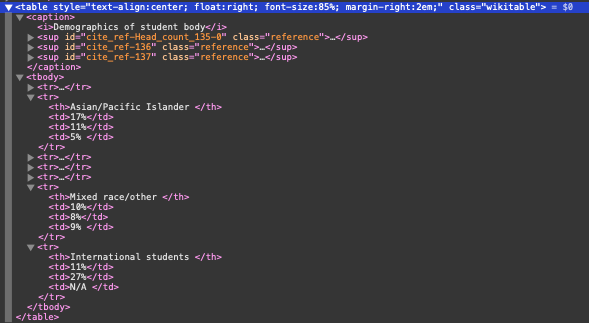

- table - table row - table header - table columns(td)

In [65]:
# Query certain part
demographic_table = soup.find_all('table', 'wikitable')
table_html = str(demographic_table[2]) # stringify ceratin elements and show it as html expression.
#table_html = str(soup.find("table", "wikitable"))

In [66]:
from IPython.core.display import HTML
HTML(table_html)
# HTML을 읽어서 표현할 수 있는 코드

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


First we'll use a list comprehension to extract the rows (*tr*) elements.

In [71]:
#### My trial
rows = [row for row in demographic_table[2].find_all("tr")]
# 위 표의 로우별 HTML element.

# extract only the numbers to use it as matrix input.
for j in rows[1:] :
    print([int(percent_to_score(i.text.encode('utf-8'))) if not i.text.encode('utf-8').startswith(('N','n')) else i.text.encode('utf-8').strip('\n') for i in j.find_all('td')][0:3]) #used lambda to quickly make one function.
# Do later csv write to use this table data from website.
# List comprehension => if, elif, else
# Use lambda function Or if not if in the List Comprehension.

[17, 11, 5]
[6, 4, 12]
[9, 5, 16]
[46, 43, 64]
[10, 8, 9]
[11, 27, 'N/A']


In [72]:
# 
HTML(str(demographic_table[2]))

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


---

# Lambda expressions

We will then use a lambda expression to replace new line characters with spaces. Lambda expressions are to functions what list comprehensions are to lists: namely a more concise way to achieve the same thing.

In reality, both lambda expressions and list comprehensions are a little different from their function and loop counterparts. But for the purposes of this class we can ignore those differences.

In [86]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda s: s.replace("\n", "")


## < Self trial : make function quickly by lambda>
percent_to_score = lambda p: p.strip('%,\n') if not p.startswith(('N','n')) else ('1' if p=='nan' else 'null')
rem_nl('ha\n')
percent_to_score('N/A')
## Lambda nested if => Do elif in lambda function.

'null'

---

# Functions

Let's expand a little on functions... Python is very flexible when it comes to function declarations. We've seen the lambda expression, and you might already be familiar with the _normal_ function declaration:

In [1]:
def power(x, y):
    return x**y

power(2, 3)

8

#### But Python functions can also have no arguments (if you're old school you might call these `procedures`):

In [222]:
def print_greeting():
    print "Hello!"
    
print_greeting()

Hello!


#### But Python also allows you to have default values for some parameters:

In [2]:
# The function bellow can be called with x and y, in which case it will return x*y;
# or it can be called with x only, in which case it will return x*1.
def get_multiple(x, y=1):
    return x*y

print "With x and y: ", get_multiple(10, 2)
print "With x only: ", get_multiple(10)

With x and y:  20
With x only:  10


# Named Parameter

#### Default values allow function definitions to be very flexible, and are used extensively on the libraries we'll be using. Also, note that the `x` value must be present, or the call will fail.

#### Things start to get more interesting when we have multiple default values:

In [3]:
def print_special_greeting(name, leaving=False, condition="nice"):
    print "Hi", name
    print "How are you doing in this", condition, "day?"
    if leaving:
        print "Please come back!"

We've seen that this can be called in a couple of different ways:

In [4]:
# Use all the default values.
print_special_greeting("John")

Hi John
How are you doing in this nice day?


In [5]:
# Specify all values.
print_special_greeting("John", True, "rainy")

Hi John
How are you doing in this rainy day?
Please come back!


In [6]:
# Change only the first default value.
print_special_greeting("John", True)

Hi John
How are you doing in this nice day?
Please come back!


But what if you wanted to use the first default value but change the second? Named parameters to the rescue!

In [7]:
print_special_greeting("John", condition="horrible") # specify which default you will use differently if not in order.

Hi John
How are you doing in this horrible day?


This allows us to only change the default parameters that we want, and keep the rest. The functionality itself is called _named parameters_.

There are two more, somewhat advanced, topics we will cover for functions. Arbitrary and keyword arguments allow for even more flexibility.

Arbitrary arguments are used when you're not sure how many arguments your function will get (notice the single asterisk before the second argument name):

# Arbitrary Argument

In [22]:
def print_siblings(name, *siblings):
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling
    print
        
print_siblings("John", "Ashley", "Lauren", "Arthur")
print_siblings("Mike", "John")
print_siblings("Terry")

John has the following siblings:
Ashley
Lauren
Arthur

Mike has the following siblings:
John

Terry has the following siblings:



In the function above, any optional argument will go into a list called `siblings`. We can then process that list to extract the names.

Keyword arguments mix the named argument and arbitrary properties (notice the double asterisks before the second argument name):

# Keyword Argument
### input => key without "" = value with ""

In [11]:
def print_brothers_sisters(name, **siblings): # ** is to get the redunduncy into a dictionary and it gets it like key = 'value', key = 'value' pairs for that part.
    print name, "has the following siblings:"
    for sibling in siblings:
        print sibling, ":", siblings[sibling]
    print
    
print_brothers_sisters("John", Ashley="sister", Lauren="sister", Arthur="brother")

John has the following siblings:
Arthur : brother
Lauren : sister
Ashley : sister



In [34]:
### Self Practice
def mentor_matching(team_name, **mentee):
    print team_name, "mentor - mentee is like the following"
    for a_mentor in mentee:
        print a_mentor, ':', mentee[a_mentor]

mentor_matching('barcelona', messi = 'dembele', suarez = 'griezmann', busquest = 'de jong')

# Original dictionary definition. < = > **argument_name 
a = {'messi':'dembele'}
a['messi'] #key reference

barcelona mentor - mentee is like the following
messi : dembele
busquest : de jong
suarez : griezmann


'dembele'

In [32]:
def couple_list(dept_name, **couples):
    print 'In,',dept_name,'there are'
    for a_couple in couples:
        print a_couple,'and',couples[a_couple],'is on fire.'
    
couple_list('biz development', minkyoung='seokhee', jahyun='hyelee')

In, biz development there are
minkyoung and seokhee is on fire.
jahyun and hyelee is on fire.


# All default, default arg, arbitrary arg, Keyword arg together
Lastly, when putting all those things together one must follow a certain order:

```
def my_func(arg1, arg2, opt1=True, opt2="CS109", *args, **kwargs):
    ...
```

In [45]:
### Self Training.

# Training argument type order.
def telegraph_printer(pro_1, pro_2,class_name = 'cs109',*research_themes, **mentor): # argument, default_arg, arbi_arg, keyword_arg
    print pro_1,'and',pro_2,'of',class_name
    print 'came up with'
    for i in research_themes:
        print(i)
    print 'the matchings are like following'
    for i in mentor:
        print i, ':', mentor[i]
        
telegraph_printer('wu lee', 'kim hun', 'cs231n','coco09', 'kkk', 'what', wulee = 'messi', koeun = 'suarez')

wu lee and kim hun of cs231n
came up with
coco09
kkk
what
the matchings are like following
wulee : messi
koeun : suarez


That was a lengthy interlude! Now let's get back to data science.
---

### Splitting the data

Next we extract the text value of the columns. If you look at the table above, you'll see that we have three columns and six rows.

Here we're taking the first element (Python indexes start at zero), iterating over the *th* elements inside it, and taking the text value of those elements. We should end up with a list of column names.

But there is one little caveat: the first column of the table is actually an empty string (look at the cell right above the row names). We could add it to our list and then remove it afterwards; but instead we will use the `if` statement inside the list comprehension to filter that out.

You should be familiar with `if` statements. They perform a Boolean test and an action if the test was successful. Python considers most values to be equivalent to True. The exceptions are False, None, 0, "" (empty string), []/{}/(,)... (empty containers). Here the `get_text` will return an empty string for the first cell of the table, which means that the test will fail and the value will not be added to the list.

#### 파이썬은 빈 리스트, 문자열, 튜플, 사전, 0, None, False 에서 if 문 실행을 거절한다.

In [124]:
columns = [rem_nl(col.get_text()) for col in rows[0].find_all("th") if col.get_text()] # \n remover => ' '  
columns

[u'Undergrad', u'Graduate', u'U.S. census']

Now let's do the same for the rows. Notice that since we have already parsed the header row, we will continue from the second row. The `[1:]` is a slice notation and in this case it means we want all values starting from the second position.

In [248]:
indexes = [row.find("th").get_text() for row in rows[1:]]
indexes

[u'Asian/Pacific Islander\n',
 u'Black/non-Hispanic\n',
 u'Hispanics of any race\n',
 u'White/non-Hispanic\n',
 u'Mixed race/other\n',
 u'International students\n']

In [93]:
# 각 칼럼의 이름 만약 텍스트가 있을 경우에만 가져오기.
[rem_nl(i.get_text().encode('utf-8')) for i in rows[0].find_all('th') if i.get_text()]

# 각 로우의 이름 가져오기.
[rem_nl(j.find('th').get_text()).encode('utf-8') for j in rows[1:]]

['Asian/Pacific Islander',
 'Black/non-Hispanic',
 'Hispanics of any race',
 'White/non-Hispanic',
 'Mixed race/other',
 'International students']

In [95]:
# Here's the original HTML table.
HTML(table_html)

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


Here we have another lambda expression that transforms the string on the cells to integers. We start by checking if the last character of the string (Python allows for negative indexes) is a percent sign. If that is true, then we convert the characters before the sign to integers. Lastly, if one of the prior checks fails, we return a value of None.

This is a very common pattern in Python, and it works for two reasons: Python's `and` and `or` are "short-circuit" operators. This means that if the first element of an `and` statement evaluates to False, the second one is never computed (which in this case would be a problem since we can't convert a non-digit string to an integer). The `or` statement works the other way: if the first element evaluates to True, the second is never computed.

The second reason this works is because these operators will return the value of the last expression that was evaluated, which is this case will be either the integer value or the value `None`.

One last thing to notice: Python slices are open on the upper bound. So the `[:-1]` construct will return all elements of the string, except for the last.

In [120]:
to_num = lambda s: s[-1] == "%" and int(s[:-1]) or None

# Logic design
# 1*x = x 
# 0^x = x  => based on simple logic design facts.

# %가 있다면 그 앞 숫자들을 인트화하고 없다면 None을 리턴하는 로직을 짜라.
str_2_num = lambda s: s[-1] == '%' and int(s[:-1]) or None
print(str_2_num('10%'))

10


Now we use the lambda expression to parse the table values.

Notice that we have two `for ... in ...` in this list comprehension. That is perfectly valid and somewhat common. Although there is no real limit to how many iterations you can perform at once, having more than two can be visually unpleasant, at which point regular nested loops might be a better solution.

In [123]:
# Self Trial
to_num = lambda s: int(s[:-1]) if s.endswith('%') else (int(s[:-2]) if s.endswith('%\n') else None)
values = [to_num(value.get_text()) for row in rows[1:] for value in row.find_all("td")]
values

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]

The problem with the list above is that the values lost their grouping.

The `zip` function is used to combine two sequences element wise. So `zip([1,2,3], [4,5,6])` would return `[(1, 4), (2, 5), (3, 6)]`.

This is the first time we see a container bounded by parenthesis. This is a tuple, which you can think of as an immutable list (meaning you can't add, remove, or change elements from it). Otherwise they work just like lists and can be indexed, sliced, etc.

In [153]:
# zip is used for element wise re-team up into tuples.
row_by_row = zip(*[values[i::3] for i in range(len(columns))])
row_by_row


# [Self practice]
# Self observation : If the information is given in column vectors and you'd like to analyze it row-wise
# use zip in python.
print(zip(*[(1,4,7),(2,5,8),(3,6,9)])) # elemenet wise pair maker. => row vector 2 column vectors
# Practice arbitrary argument and => contrainer type unpacking for function input.
def product(*x):
    result = 1
    for i in x:
        result=result*i
    return result

product(*{1:'a',23:'b',4:'c'})


[(1, 2, 3), (4, 5, 6), (7, 8, 9)]


92

In [154]:
# Here's the original HTML table.
HTML(table_html)

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


---

### Exploding parameters

The asterisk before the list comprehension is used to _explode_ the list. Take a look at the function calls bellow:

In [157]:
def print_args(arg1, arg2, arg3):
    print arg1, arg2, arg3

# Print three numbers.
print_args(1, 2, 3)

# Print three lists.
print_args([1, 10], [2, 20], [3, 30])

1 2 3
[1, 10] [2, 20] [3, 30]


But sometimes we have a container holding our parameters. Here's the hard way to handle this:

In [158]:
parameters = [100, 200, 300]

p1 = parameters[0]
p2 = parameters[1]
p3 = parameters[2]

print_args(p1, p2, p3)

100 200 300


A slightly better way to handle this is to use the unpacking functionality. We can assign values from a container directly to variables using the syntax bellow (note that the container can have more values than there are variables, but not the other way around):

In [162]:
p4, p5, p6 = parameters # unpacking tuples, list, dictionary

print_args(p4, p5, p6)

a, b = {'nike':[1,3,5], 'puma':[3,2,1]}
# dictionary unpacking is random in its order. 
# If you are to unpack all the keys of the dictionary it won't be in the order in which you input the data.

100 200 300


But the best way to handle these situations is to _explode_ the list by placing an asterisk before it:

In [166]:
print_args(*parameters)

# container data => unpacking

100 200 300


Notice that this has the opposite effect of when we used it during the function definition. There the asterisk packed the optional arguments into a list; here it unpacked the list into individual arguments.

---

### Dictionary comprehension

By the way, Python has another _comprehension_ that will be useful in the future: the `dictionary comprehension`. The syntax is very similar to the `list comprehension`, but we use curly instead of square brackets, and we must define both the key and value of each iteration.

An example is in order:

In [174]:
print(indexes)
print(stacked_values)
{ind: value for ind, value in zip(indexes, stacked_values)} # tupled, list pairs unpack => iterate => assign it as dictionary.

# Self Trial
#zip([i.encode('utf-8').strip('\n') for i in indexes],stacked_values) # zip !! pair them into tuples remember !!

[u'Asian/Pacific Islander\n', u'Black/non-Hispanic\n', u'Hispanics of any race\n', u'White/non-Hispanic\n', u'Mixed race/other\n', u'International students\n']
[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]


{u'Asian/Pacific Islander\n': (17, 11, 5),
 u'Black/non-Hispanic\n': (6, 4, 12),
 u'Hispanics of any race\n': (9, 5, 16),
 u'International students\n': (11, 27, None),
 u'Mixed race/other\n': (10, 8, 9),
 u'White/non-Hispanic\n': (46, 43, 64)}

---

## Pandas data structures

### DataFrames

To recap, we now have three data structures holding our column names, our row (index) names, and our values grouped by index.

We will now load this data into a Pandas DataFrame. The loading process is pretty straightforward, and all we need to do is tell Pandas which container goes where.

In [175]:
import pandas as pd

In [251]:
# Variable update into string : Ready!
columns = [i.encode('utf-8') for i in columns]
indexes = [j.encode('utf-8').strip('\n') for j in indexes]
print(columns)
print(indexes)
print(stacked_values)
print(values)

['Undergrad', 'Graduate', 'U.S. census']
['Asian/Pacific Islander', 'Black/non-Hispanic', 'Hispanics of any race', 'White/non-Hispanic', 'Mixed race/other', 'International students']
[(17, 11, 5), (6, 4, 12), (9, 5, 16), (46, 43, 64), (10, 8, 9), (11, 27, None)]
[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]


In [252]:
# Method1: pass tuples of rows, columns = , index = info.

pd.DataFrame(stacked_values, columns = columns, index = indexes)

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17,11,5.0
Black/non-Hispanic,6,4,12.0
Hispanics of any race,9,5,16.0
White/non-Hispanic,46,43,64.0
Mixed race/other,10,8,9.0
International students,11,27,NaN


In [257]:
# Method2: Pass a list of {columnname: value, columnname: value, .. }/per row (dictionary compre.) and index = indexes
list_of_dict = [{key: value for key,value in zip(columns,a_tuple)} for a_tuple in stacked_values] # list of col_name: value dictionary per a row
print(list_of_dict)
pd.DataFrame(list_of_dict, index = indexes)

[{'Undergrad': 17, 'U.S. census': 5, 'Graduate': 11}, {'Undergrad': 6, 'U.S. census': 12, 'Graduate': 4}, {'Undergrad': 9, 'U.S. census': 16, 'Graduate': 5}, {'Undergrad': 46, 'U.S. census': 64, 'Graduate': 43}, {'Undergrad': 10, 'U.S. census': 9, 'Graduate': 8}, {'Undergrad': 11, 'U.S. census': None, 'Graduate': 27}]


,Graduate,U.S. census,Undergrad
Asian/Pacific Islander,11,5.0,17
Black/non-Hispanic,4,12.0,6
Hispanics of any race,5,16.0,9
White/non-Hispanic,43,64.0,46
Mixed race/other,8,9.0,10
International students,27,NaN,11


In [296]:
# Method3, collect, each whole column, match them and its column name into dictionary and put that with index
whole_col_data = [values[i::3]for i in range(len(columns))] # bind it as columns
dict_whole_col = {col_name:vec for col_name,vec in zip(columns, whole_col_data)}
table = pd.DataFrame(dict_whole_col, index = indexes)
table = table[['Graduate','Undergrad','U.S. census']]
table

,Graduate,Undergrad,U.S. census
Asian/Pacific Islander,11,17,5.0
Black/non-Hispanic,4,6,12.0
Hispanics of any race,5,9,16.0
White/non-Hispanic,43,46,64.0
Mixed race/other,8,10,9.0
International students,27,11,NaN


---

#### Other ways to create the DataFrame

That was one of many ways to construct a dataframe. Here is another that uses a list of dictionaries:

First we combine the list and dictionary comprehensions to get a list of dictionaries representing each row in the data.

And yet another that uses a dictionary of lists:

To achieve this we group the values columnwise...

In [258]:
# Here's the original HTML table.
HTML(table_html)

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander,17%,11%,5%
Black/non-Hispanic,6%,4%,12%
Hispanics of any race,9%,5%,16%
White/non-Hispanic,46%,43%,64%
Mixed race/other,10%,8%,9%
International students,11%,27%,N/A


In [196]:
print(values)

[17, 11, 5, 6, 4, 12, 9, 5, 16, 46, 43, 64, 10, 8, 9, 11, 27, None]


In [197]:
stacked_by_col = [values[i::3] for i in range(len(columns))]
stacked_by_col

[[17, 6, 9, 46, 10, 11], [11, 4, 5, 43, 8, 27], [5, 12, 16, 64, 9, None]]

and then revert the pattern we used to create a list of dictionaries.

In [199]:
data_lists = {col: val for col, val in zip(columns, stacked_by_col)}
data_lists

{u'Graduate': [11, 4, 5, 43, 8, 27],
 u'U.S. census': [5, 12, 16, 64, 9, None],
 u'Undergrad': [17, 6, 9, 46, 10, 11]}

In [200]:
pd.DataFrame(data_lists, index=indexes)

,Graduate,U.S. census,Undergrad
Asian/Pacific Islander\n,11,5.0,17
Black/non-Hispanic\n,4,12.0,6
Hispanics of any race\n,5,16.0,9
White/non-Hispanic\n,43,64.0,46
Mixed race/other\n,8,9.0,10
International students\n,27,NaN,11


---
 
### DataFrame cleanup : What to do with NaN

Our DataFrame looks nice; but does it have the right data types?

In [298]:
df

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander\n,17,11,5.0
Black/non-Hispanic\n,6,4,12.0
Hispanics of any race\n,9,5,16.0
White/non-Hispanic\n,46,43,64.0
Mixed race/other\n,10,8,9.0
International students\n,11,27,NaN


In [297]:
df.dtypes

Undergrad        int64
Graduate         int64
U.S. census    float64
dtype: object

The `U.S Census` looks a little strange. It should have been evaluated as an integer, but instead it came in as a float. It probably has something to do with the `NaN` value...

In fact, missing values can mess up a lot of our calculations, and some function don't work at all when `NaN` are present. So we should probably clean this up.

One way to do that is by dropping the rows that have missing values:

In [302]:
df.dropna() # 디폴트 axis = 0 rowwise

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander\n,17,11,5.0
Black/non-Hispanic\n,6,4,12.0
Hispanics of any race\n,9,5,16.0
White/non-Hispanic\n,46,43,64.0
Mixed race/other\n,10,8,9.0


Or the columns that have missing values:

In [314]:
df.dropna(axis=0) # 로우와이즈 => 난발류 있는 칸 삭제
# 칼럼와이즈 => 난발류 있는 칸 삭제

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander\n,17,11,5.0
Black/non-Hispanic\n,6,4,12.0
Hispanics of any race\n,9,5,16.0
White/non-Hispanic\n,46,43,64.0
Mixed race/other\n,10,8,9.0


But we will take a less radical approach and replace the missing value with a zero. In this case this solution makes sense, since 0% value meaningful in this context. We will also transform all the values to integers at the same time.

In [316]:
df_clean = df.fillna(0).astype(int) # fill NaN => as 0 / change all of the frame as int
df_clean

,Undergrad,Graduate,U.S. census
Asian/Pacific Islander\n,17,11,5
Black/non-Hispanic\n,6,4,12
Hispanics of any race\n,9,5,16
White/non-Hispanic\n,46,43,64
Mixed race/other\n,10,8,9
International students\n,11,27,0


In [317]:
df_clean.dtypes

Undergrad      int64
Graduate       int64
U.S. census    int64
dtype: object

Now our table looks good!

Let's see some basic statistics about it.

In [318]:
df_clean.dtypes
df_clean.describe()

,Undergrad,Graduate,U.S. census
count,6.000000,6.000000,6.000000
mean,16.500000,16.333333,17.666667
std,14.896308,15.513435,23.363790
min,6.000000,4.000000,0.000000
25%,9.250000,5.750000,6.000000
50%,10.500000,9.500000,10.500000
75%,15.500000,23.000000,15.000000
max,46.000000,43.000000,64.000000


---

### NumPy

Pandas is awesome, but it is built on top of another library that we will use extensively during the course. NumPy implements new data types and vectorized functions.

In [319]:
import numpy as np

The `values` method of the DataFrame will return a two-dimensional `array` with the DataFrame values. The `array` is a NumPy structure that we will be using a lot during this class.

In [321]:
df_clean.values

array([[17, 11,  5],
       [ 6,  4, 12],
       [ 9,  5, 16],
       [46, 43, 64],
       [10,  8,  9],
       [11, 27,  0]])

Let's see if this is indeed a NumPy type...

In [322]:
type(df_clean.values)

numpy.ndarray

NumPy also offers many functions that can operate directly on the DataFrame.

In [324]:
np.mean(df_clean)
np.mean(df_clean.Undergrad)

16.5

In [326]:
np.std(df_clean.transpose())

Asian/Pacific Islander\n     4.898979
Black/non-Hispanic\n         3.399346
Hispanics of any race\n      4.546061
White/non-Hispanic\n         9.273618
Mixed race/other\n           0.816497
International students\n    11.085526
dtype: float64

---

### DataFrame indexing

Having the data on a DataFrame would be useless if we could not access individual cells. There are many ways to index DataFrames, and we will cover the most common bellow.

Indexing columns is easy. You can use either the dictionary syntax or the dot syntax. Please note that if the column name contains spaces or other special characters, your only choice will be to use the dictionary syntax.

### 1). Indexing columns

In [328]:
# Dictionary syntax.
df_clean["Undergrad"]

Asian/Pacific Islander\n    17
Black/non-Hispanic\n         6
Hispanics of any race\n      9
White/non-Hispanic\n        46
Mixed race/other\n          10
International students\n    11
Name: Undergrad, dtype: int64

In [329]:
# Dot syntax.
df_clean.Undergrad

Asian/Pacific Islander\n    17
Black/non-Hispanic\n         6
Hispanics of any race\n      9
White/non-Hispanic\n        46
Mixed race/other\n          10
International students\n    11
Name: Undergrad, dtype: int64

### 2).Indexing rows

But what about when you want to get a specific row? DataFrames have three different ways of achieving that.

`DataFrame.loc` allows you to reference a row by index name.

In [331]:
# By row index name => key
df_clean.loc["Asian/Pacific Islander\n"]

Undergrad      17
Graduate       11
U.S. census     5
Name: Asian/Pacific Islander\n, dtype: int64

`DataFrame.iloc` on the other hand uses the row number (starting from zero, of course).

In [334]:
# By row index in number
df_clean.iloc[2]

Undergrad       9
Graduate        5
U.S. census    16
Name: Hispanics of any race\n, dtype: int64

A third way to do it is with `DataFrame.ix`. This is a hybrid of the previous two and allows you to access a row by name or number. Please note that `ix` can misbehave sometimes, so the previous two methods should be used whenever possible.

In [337]:
df_clean.ix["Asian/Pacific Islander\n"]

/Applications/anaconda3/envs/python_2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Undergrad      17
Graduate       11
U.S. census     5
Name: Asian/Pacific Islander\n, dtype: int64

In [338]:
df_clean.ix[0]

/Applications/anaconda3/envs/python_2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Undergrad      17
Graduate       11
U.S. census     5
Name: Asian/Pacific Islander\n, dtype: int64

We can also reference individual cells by specifying the desired row and column.

In [342]:
df_clean.loc["White/non-Hispanic\n", "Graduate"]

43

In [343]:
df_clean.iloc[3, 1]

43

In [345]:
df_clean.ix[3, "Graduate"]

/Applications/anaconda3/envs/python_2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


43

---

### Split-Apply-Combine pattern

In [362]:
# Ignore this cell for now.
df_flat = df_clean.stack().reset_index()
df_flat.columns = ['race', 'level', 'possession']
#df_flat.columns = ["race", "source", "percentage"]
#df_flat
df_flat.index = range(1,19) # col, row, index table => flattened.
df_flat

,race,level,possession
1,Asian/Pacific Islander\n,Undergrad,17
2,Asian/Pacific Islander\n,Graduate,11
3,Asian/Pacific Islander\n,U.S. census,5
4,Black/non-Hispanic\n,Undergrad,6
5,Black/non-Hispanic\n,Graduate,4
6,Black/non-Hispanic\n,U.S. census,12
7,Hispanics of any race\n,Undergrad,9
8,Hispanics of any race\n,Graduate,5
9,Hispanics of any race\n,U.S. census,16
10,White/non-Hispanic\n,Undergrad,46


Another common task will be to group tasks. After flattening the DataFrame into one with numerical indexes and column for each feature, we can access individual groups by using the `groupby` method.

In [372]:
grouped = df_flat.groupby("race")
# apply groups to groupby object , it will show which rows belong to it.
grouped.groups

{u'Asian/Pacific Islander\n': Int64Index([1, 2, 3], dtype='int64'),
 u'Black/non-Hispanic\n': Int64Index([4, 5, 6], dtype='int64'),
 u'Hispanics of any race\n': Int64Index([7, 8, 9], dtype='int64'),
 u'International students\n': Int64Index([16, 17, 18], dtype='int64'),
 u'Mixed race/other\n': Int64Index([13, 14, 15], dtype='int64'),
 u'White/non-Hispanic\n': Int64Index([10, 11, 12], dtype='int64')}

Please note that the resulting object will not be a DataFrame, and you must execute an aggregate function on the groups to bring them back into a DataFrame format.

In [373]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [391]:
mean_percs = grouped.mean()
mean_percs

,possession
race,
Asian/Pacific Islander\n,11.000000
Black/non-Hispanic\n,7.333333
Hispanics of any race\n,10.000000
International students\n,12.666667
Mixed race/other\n,9.000000
White/non-Hispanic\n,51.000000


In [392]:
type(mean_percs)

pandas.core.frame.DataFrame

We can also iterate over the groups using a regular `for` loop.

In [396]:
for name, group in df_flat.groupby("race", sort=True): # group_by object => unpacked into two variables.
    print name
    print group

Asian/Pacific Islander

                       race        level  possession
1  Asian/Pacific Islander\n    Undergrad          17
2  Asian/Pacific Islander\n     Graduate          11
3  Asian/Pacific Islander\n  U.S. census           5
Black/non-Hispanic

                   race        level  possession
4  Black/non-Hispanic\n    Undergrad           6
5  Black/non-Hispanic\n     Graduate           4
6  Black/non-Hispanic\n  U.S. census          12
Hispanics of any race

                      race        level  possession
7  Hispanics of any race\n    Undergrad           9
8  Hispanics of any race\n     Graduate           5
9  Hispanics of any race\n  U.S. census          16
International students

                        race        level  possession
16  International students\n    Undergrad          11
17  International students\n     Graduate          27
18  International students\n  U.S. census           0
Mixed race/other

                  race        level  possession
13  Mixed r

---

### Simple Plotting

DataFrames also have some basic plotting capabilities. We will mostly be using `Matplotlib` for plotting since it allows for much more granular control; but DataFrame plots can be very useful for a quick visualization of the data.

In [401]:
# Here we're just telling the iPython notebook to render the plots on the cells.
%matplotlib inline

,possession
race,
Asian/Pacific Islander\n,11.000000
Black/non-Hispanic\n,7.333333
Hispanics of any race\n,10.000000
International students\n,12.666667
Mixed race/other\n,9.000000
White/non-Hispanic\n,51.000000


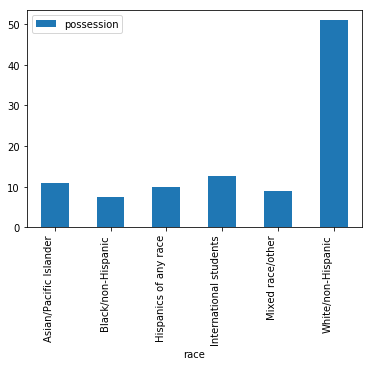

In [403]:
mean_percs.plot(kind="bar");
mean_percs

---

## Conclusion

That's it! It might not look like it but we accomplished a lot. We scraped some data from a website, extracted the parts that we were interested in, and then parsed and cleaned it. We then proceeded to using this data to create a Pandas DataFrame, and use the latter to analyze the data. You should now have the basic knowledge to star working on HW0. Have fun!